                                           image_path  label label_name  \
48  /content/flower_photos_new/003.roses/003_0197.jpg      2      roses   

                                              heatmap  
48  cnumpy.core.multiarray\n_reconstruct\np1\n(cnu...  

----Result----
/Users/Miyeah/Downloads/flower_photos_new/003.roses/003_0197.jpg
roses
[[0.1096617  0.1116771  0.11369249 ... 0.01564211 0.01564211 0.01564211]
 [0.12115556 0.12310506 0.1250546  ... 0.01743886 0.01743886 0.01743886]
 [0.1326494  0.13453303 0.13641667 ... 0.01923562 0.01923562 0.01923562]
 ...
 [0.41138807 0.41520327 0.4190185  ... 0.25689346 0.25689346 0.25689346]
 [0.41138807 0.41520327 0.4190185  ... 0.25689346 0.25689346 0.25689346]
 [0.41138807 0.41520327 0.4190185  ... 0.25689346 0.25689346 0.25689346]]
0.32854092
0.16862476
0.0
1.0
0.32854092
0.16862476
0.0
1.0
[[0.10966169 0.1116771  0.11369249 ... 0.01564211 0.01564211 0.01564211]
 [0.12115555 0.12310506 0.1250546  ... 0.01743886 0.01743886 0.01743886]


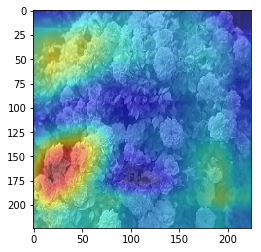

In [119]:
import pandas as pd
import numpy as np
import _pickle as cPickle
import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.transform
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing

# NOTES: 请注意39行

# 以哥大邮箱身份查看以下共享文件
# 原始图片数据集:
# https://drive.google.com/file/d/1HRTIVM6lyalQuF07V2eKywwMA5BJcSJh/view?usp=sharing
# Test最终pickle
# https://drive.google.com/file/d/1n0ilgTl5ODQslNTQ0L2SVX7nfEpZrtiG/view?usp=sharing
# Train最终pickle
# https://drive.google.com/file/d/1m8DlDpvhtie8tjd4TS9O-n0Miw0KxfSp/view?usp=sharing

def load_image( path ):
    try:
        img = skimage.io.imread( path )
    except Exception as e:
        print(e)
        return None

    img = skimage.color.rgb2lab(img)
    # 生成灰度图
    img[:,:,2] = 0
    img[:,:,1] = 0
    img = skimage.color.lab2rgb(img)

    if img is None: return None
    if len(img.shape) < 2: return None
    if len(img.shape) == 4: return None
    if len(img.shape) == 2: img=np.tile(img[:,:,None], 3)
    if img.shape[2] == 4: img=img[:,:,:3]
    if img.shape[2] > 4: return None

    #TODO: ！！提醒zxy 修改自己的代码 两边resize逻辑不一样 换成这个吧！！
    resized_img = skimage.transform.resize( img, [224,224] , mode='constant')
    return resized_img


#以下为用法

#NOTES: 35 test samples per class, 175 test samples in total
#NOTES: 699 train samples per class, 3495 train samples in total
data = pd.read_pickle("/Users/Miyeah/Downloads/testset-final.pickle")
#data = pd.read_pickle("/Users/Miyeah/Downloads/trainset-final.pickle")

#图片序号 可以自行更改看效果
record_idx = 48
record = data[record_idx:record_idx+1]
print(record)
#修改flower_photos_new文件夹前缀地址
path = record["image_path"].values[0].replace("/content/","/Users/Miyeah/Downloads/")
label_name = record["label_name"].values[0]
raw = record["heatmap"].values[0]
heatmap = cPickle.loads(bytes(raw, "utf-8"), encoding="bytes")
print()
print("----Result----")
print(path)
print(label_name)

#热力图原始数据
print(heatmap)
print(np.mean(heatmap))
print(np.std(heatmap))
print(np.min(heatmap))
print(np.max(heatmap))
print("======")
heatmap = heatmap.flatten()
# heatmap = np.log(1+heatmap)
#heatmap = preprocessing.scale(heatmap)
mean = np.mean(heatmap)
std = np.std(heatmap)
# Z-score
heatmap = (heatmap)/float(0.8*std)

X = heatmap
min = 0
max = 1
X_std=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))
X_scaled=X_std/(max-min)+min
heatmap = X_scaled

print(np.mean(heatmap))
print(np.std(heatmap))
print(np.min(heatmap))
print(np.max(heatmap))
heatmap = np.reshape(heatmap, (224, 224))
print(heatmap)
# scaler = StandardScaler().fit(heatmap)
# heatmap = scaler.transform(heatmap)
# print(heatmap)

img = load_image(path)
plt.imshow(img)
# plt.imshow( heatmap, cmap=plt.cm.gray, alpha=0.5 )
plt.imshow( heatmap, cmap=plt.cm.jet, alpha=0.5, interpolation='nearest' )
plt.show()

In [ ]:
# 我有一个想法 就是 /std的倍数 比如 /  n * std 。 这个n本身就是一个自由变量 可以train一个最佳结果的 （根据class类别）

In [ ]:
#验证且保证最后min-max到0-1 ?